## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./Custom Dataset/dataset.csv")

## Pre Processing

In [4]:
data.head()

,Time,vib1,vib2
0,0.000,5.145365,4.963144
1,0.001,5.143391,4.960842
2,0.002,5.143391,4.961829
3,0.003,5.145365,4.963144
4,0.004,5.145365,4.962157


In [5]:
data.isna().sum()

Time    0
vib1    0
vib2    0
dtype: int64

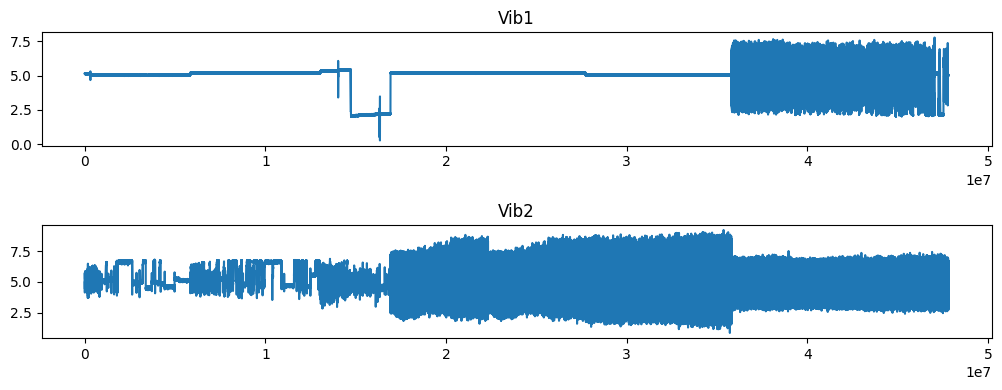

In [6]:
plt.figure(figsize=(10,4))

plt.subplot(2,1,1), data["vib1"].plot(), plt.title("Vib1")
plt.subplot(2,1,2), data["vib2"].plot(), plt.title("Vib2")

plt.tight_layout()

In [7]:
# data_downsampled = np.array(data[:len(data) - len(data)%10])[:,1:]
# data_downsampled = data_downsampled.reshape(-1, 10, 2)
# data_downsampled = np.mean(data_downsampled, axis=1)

# data2 = pd.DataFrame(data_downsampled, columns=["vib1", "vib2"])

data2 = data.iloc[::10, :]

In [8]:
data2.shape

(4781518, 3)

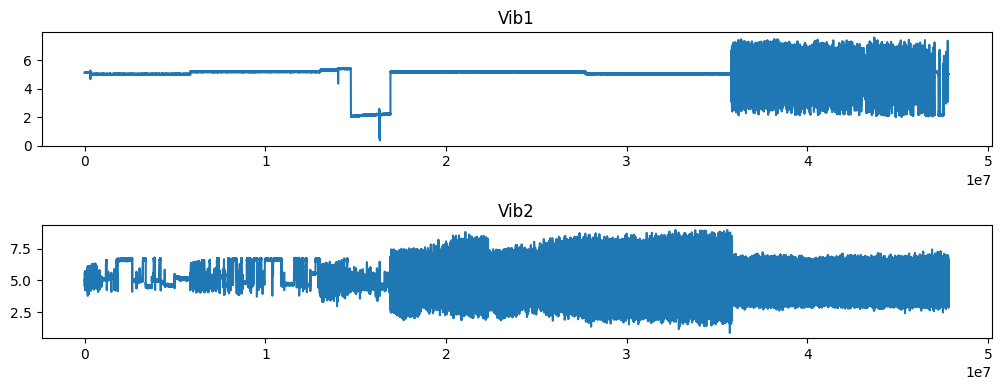

In [9]:
plt.figure(figsize=(10,4))

plt.subplot(2,1,1), data2["vib1"].plot(), plt.title("Vib1")
plt.subplot(2,1,2), data2["vib2"].plot(), plt.title("Vib2")

plt.tight_layout()

## Feature Extraction

In [10]:
import math

In [11]:
# finding window size

window_size = math.ceil(math.log10(len(data)))
window_size*100

800

In [12]:
# returns a 2d array where each child array is the calculated window
def SlidingWindow(data, window_length, window_shift):
    mov = np.lib.stride_tricks.sliding_window_view(data, window_length)[::window_shift]
    return np.array(mov)

In [13]:
moving_window_data_1 = SlidingWindow(data2["vib1"], window_size, 1)
moving_window_data_2 = SlidingWindow(data2["vib2"], window_size, 1)

mean_1 = np.mean(moving_window_data_1, axis=1)
std_1 = np.std(moving_window_data_1, axis=1)
# kurt_1 = kurtosis(moving_window_data_1, axis=1, fisher=False)
# skewness_1 = skew(moving_window_data_1, axis=1)
maximum_1 = np.max(moving_window_data_1, axis=1)
rms_1 = np.sqrt(np.mean(np.square(moving_window_data_1), axis=1))
# diff_1 = np.diff(np.diff(np.diff(moving_window_data_1)))

mean_2 = np.mean(moving_window_data_2, axis=1)
std_2 = np.std(moving_window_data_2, axis=1)
# kurt_2 = kurtosis(moving_window_data_2, axis=1, fisher=False)
# skewness_2 = skew(moving_window_data_2, axis=1)
maximum_2 = np.max(moving_window_data_2, axis=1)
rms_2 = np.sqrt(np.mean(np.square(moving_window_data_2), axis=1))

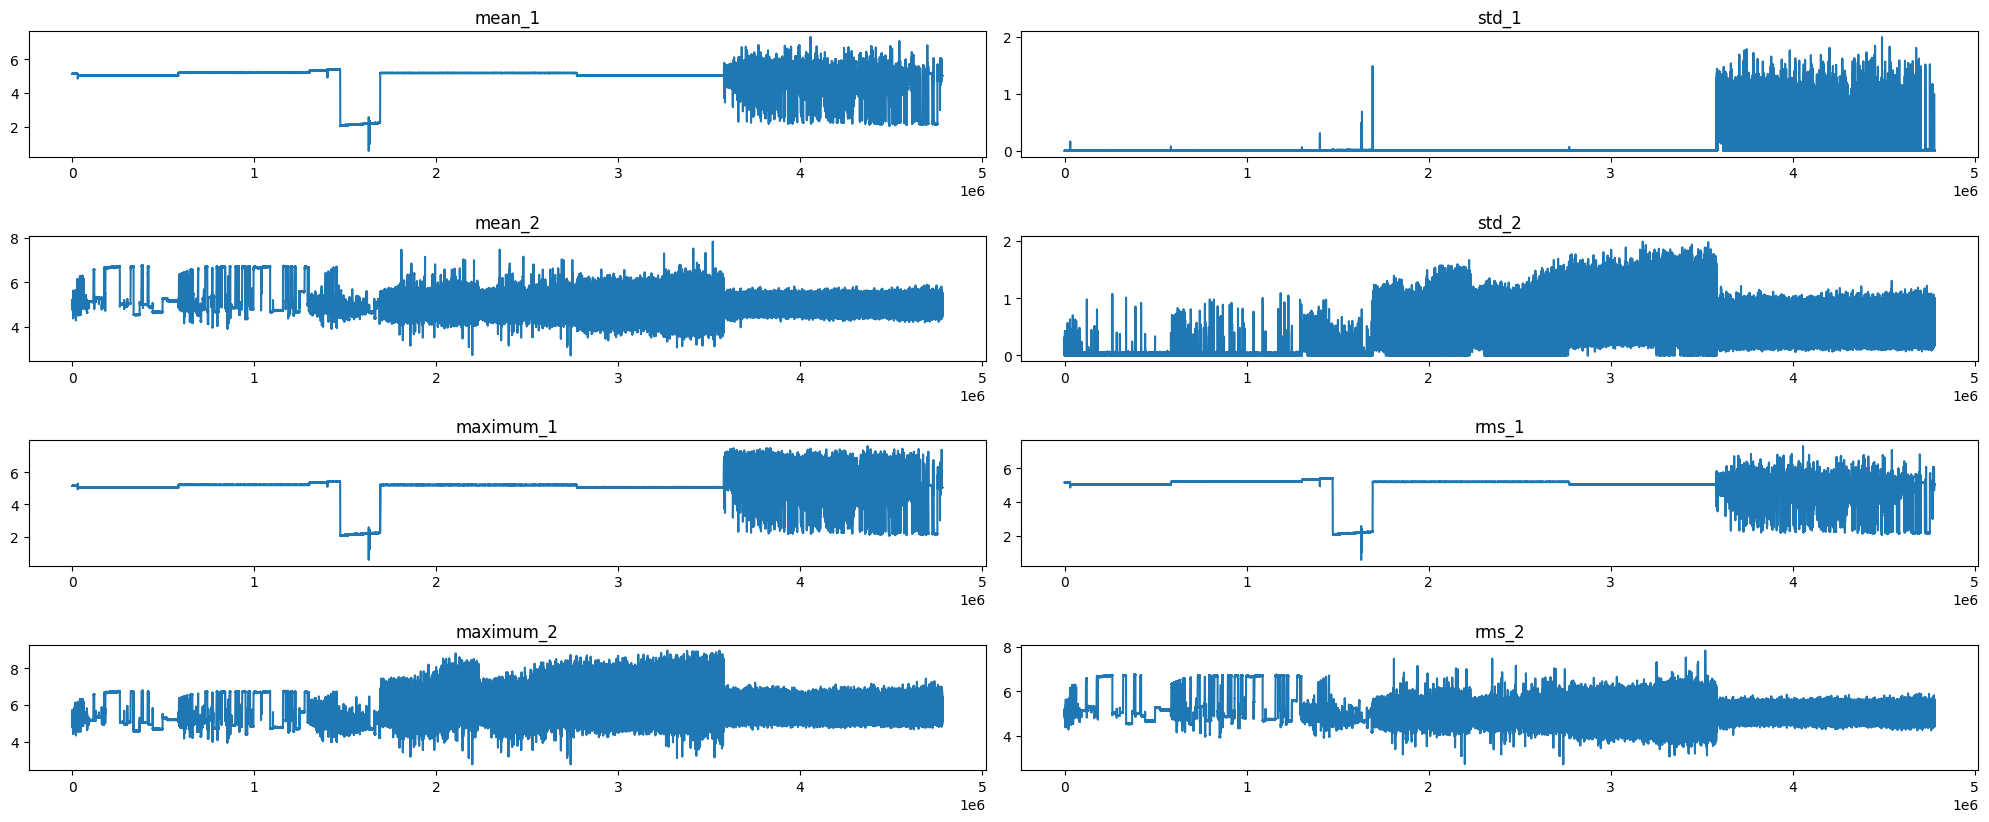

In [14]:
plt.figure(figsize=(20,12))
plt.subplot(6,2,1), plt.plot(mean_1), plt.title("mean_1")
plt.subplot(6,2,3), plt.plot(mean_2), plt.title("mean_2")

plt.subplot(6,2,2), plt.plot(std_1), plt.title("std_1")
plt.subplot(6,2,4), plt.plot(std_2), plt.title("std_2")

# plt.subplot(6,2,5), plt.plot(kurt_1), plt.title("kurt_1")
# plt.subplot(6,2,7), plt.plot(kurt_2), plt.title("kurt_2")

# plt.subplot(6,2,6), plt.plot(skewness_1), plt.title("skewness_1")
# plt.subplot(6,2,8), plt.plot(skewness_2), plt.title("skewness_2")

plt.subplot(6,2,5), plt.plot(maximum_1), plt.title("maximum_1")
plt.subplot(6,2,7), plt.plot(maximum_2), plt.title("maximum_2")

plt.subplot(6,2,6), plt.plot(rms_1), plt.title("rms_1")
plt.subplot(6,2,8), plt.plot(rms_2), plt.title("rms_2")

# plt.subplot(6,2,9), plt.plot(diff_1), plt.title("diff_1")
# plt.subplot(6,2,11), plt.plot(rms_2), plt.title("rms_2")

plt.tight_layout()

(array([1.00000e+00, 1.00000e+00, 1.00000e+00, 8.00000e+00, 2.80000e+01,
        5.50000e+01, 1.59000e+02, 3.19000e+02, 6.97000e+02, 1.24600e+03,
        2.01900e+03, 3.65400e+03, 5.08200e+03, 8.45300e+03, 1.28390e+04,
        1.71430e+04, 2.74210e+04, 3.86380e+04, 5.70670e+04, 9.63900e+04,
        1.48679e+05, 2.12732e+05, 3.48467e+05, 4.96350e+05, 5.14819e+05,
        5.66564e+05, 5.10792e+05, 4.32957e+05, 2.62167e+05, 2.18151e+05,
        1.25754e+05, 8.81650e+04, 6.57900e+04, 6.03400e+04, 4.41990e+04,
        2.47517e+05, 1.37518e+05, 9.04800e+03, 6.59700e+03, 4.78000e+03,
        3.38100e+03, 2.10600e+03, 1.58900e+03, 8.33000e+02, 4.85000e+02,
        2.75000e+02, 1.25000e+02, 6.80000e+01, 3.50000e+01, 1.40000e+01]),
 array([0.84904758, 1.0116316 , 1.17421562, 1.33679964, 1.49938366,
        1.66196768, 1.82455171, 1.98713573, 2.14971975, 2.31230377,
        2.47488779, 2.63747181, 2.80005583, 2.96263985, 3.12522387,
        3.2878079 , 3.45039192, 3.61297594, 3.77555996, 3.938143

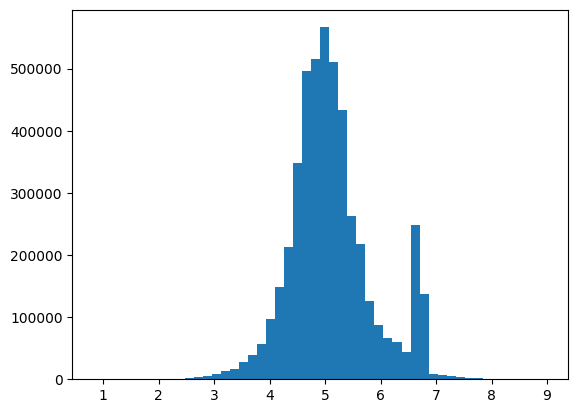

In [15]:
plt.hist(data2["vib2"], bins=50)